In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, ConfusionMatrixDisplay


In [5]:
df = pd.read_csv(r"C:\Users\hp\Downloads\archive (3)\Social_Network_Ads.csv")

In [6]:
df.shape

(400, 5)

In [7]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


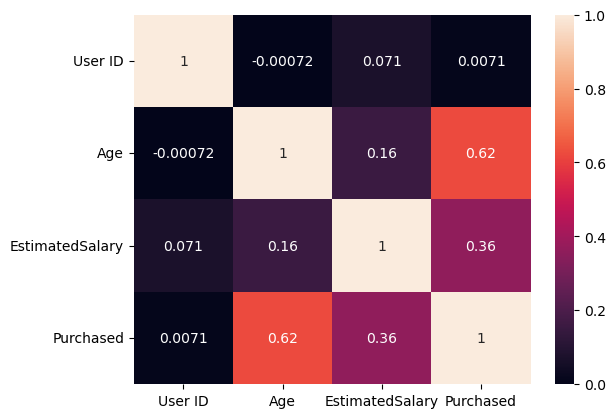

In [9]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

In [10]:
x = df[["Age", "EstimatedSalary"]]
y = df["Purchased"]

In [11]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((320, 2), (80, 2), (320,), (80,))

In [14]:
model = LogisticRegression()

In [15]:
model.fit(x_train, y_train)

LogisticRegression()

In [16]:
y_pred = model.predict(x_test)

In [17]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[50  2]
 [ 9 19]]


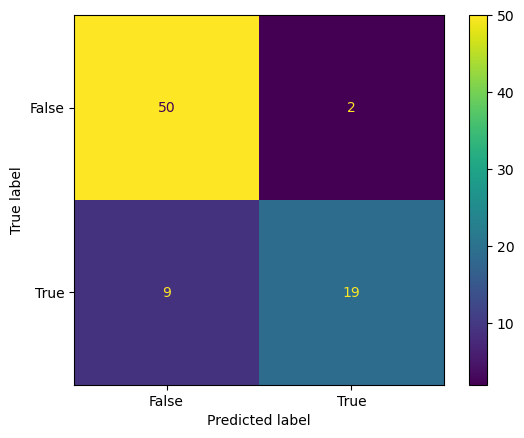

In [21]:




import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
cm_display.plot()
plt.show()


In [23]:
TN = cm[0, 0]
FP = cm[0, 1] 
FN = cm[1, 0] 
TP = cm[1, 1] 

In [24]:

print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("True Negatives (TN):", TN)
print("False Negatives (FN):", FN)

True Positives (TP): 19
False Positives (FP): 2
True Negatives (TN): 50
False Negatives (FN): 9


In [25]:
r=recall_score(y_test,y_pred,average="macro")
print("RECALL score:",r*100,"%")

RECALL score: 82.0054945054945 %


In [26]:
p=precision_score(y_test,y_pred,average="macro")
print("precision score:",p*100,"%")

precision score: 87.61097659402743 %


In [27]:
a=accuracy_score(y_test,y_pred)
print("accuracy:", a*100,"%")

accuracy: 86.25 %


In [28]:
e=a-1
print("Error rate is",e*100,"%")

Error rate is -13.749999999999996 %


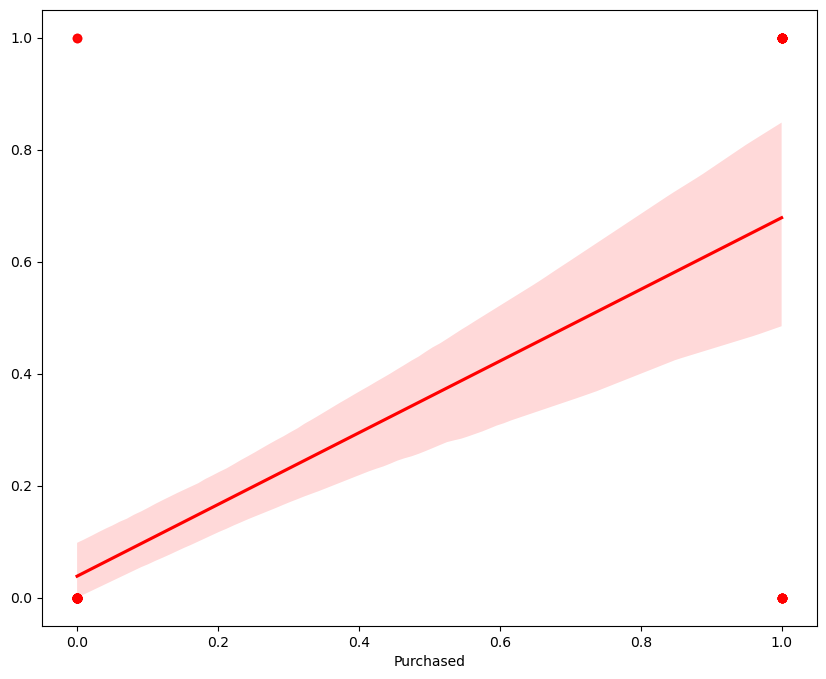

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already obtained y_pred and y_test from logistic regression

# Plot the scatterplot with logistic regression line
plt.figure(figsize=(10, 8))
sns.regplot(x=y_test, y=y_pred, color="red")

plt.show()


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80

